Images shape: (1797, 8, 8)
Data shape: (1797, 64)


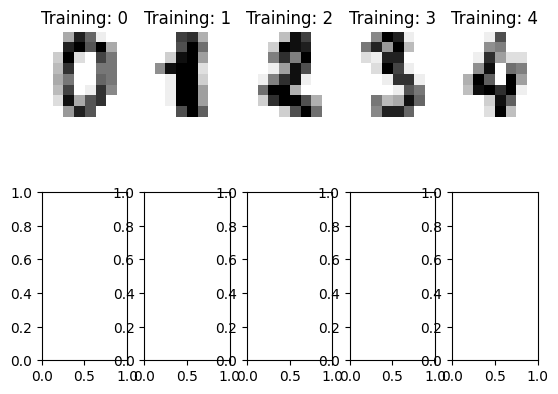

Confusion Matrix:
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 87  1  0  1  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  1 87  0  0  0  2  3  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  1  0 95  1  1  0  1]
 [ 2  0  0  0  0  0 96  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  1]
 [ 0  2  0  0  2  1  0  0 78  0]
 [ 0  0  0  1  0  0  0  1  1 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        82
           1       0.98      0.98      0.98        89
           2       0.98      1.00      0.99        83
           3       0.98      0.94      0.96        93
           4       0.97      1.00      0.98        93
           5       0.99      0.96      0.97        99
           6       0.99      0.98      0.98        98
           7       0.96      0.99      0.97        87
           8       0.95      0.94      0.95        83
           9       0.98      0.97      0.97        92

    accuracy                   

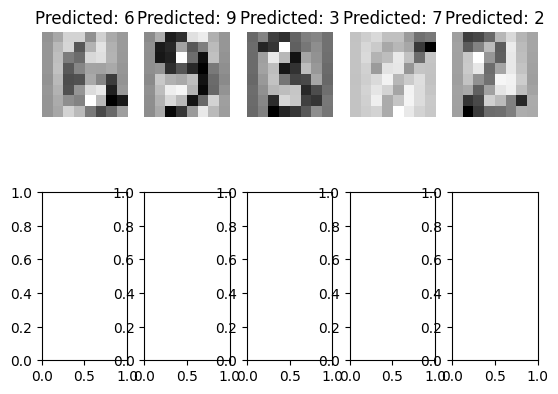

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the digits dataset
digits = datasets.load_digits()

# Print the shape of the dataset
print(f"Images shape: {digits.images.shape}")
print(f"Data shape: {digits.data.shape}")

# Display some sample images from the dataset
_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training: {label}')
plt.show()

# Flatten the images for the SVM input
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_clf = SVC(kernel='linear', gamma='auto')

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display some of the test images along with the predicted labels
_, axes = plt.subplots(2, 5)
images_and_predictions = list(zip(X_test, y_pred))
for ax, (image, prediction) in zip(axes[0, :], images_and_predictions[:5]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predicted: {prediction}')
plt.show()